# **DS514/515 Final Project**

# หัวข้อ : **วิเคราะห์ช่องทางการขายสินค้า/บริการของบริษัท A**

**สมาชิก:**
<br>1) นางสาวชนิศา อินทรโชติ (ID : 261)
<br>2) นางสาวทัสนันทน์ สัตย์ฌุชนม์ (ID : 267)
<br>3) นางสาวอัจฉราภรณ์ พรพัฒนทรัพย์ (ID : 307)
<br><br>
**Dataset:** ยอดขายสินค้า/บริการของบริษัทแห่งหนึ่ง <br>
**link Source:** -

## **Import Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib as mpl

mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font',family='TH Sarabun Chula')

## **Import Dataset**

In [ ]:
#เชื่อมต่อ google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#กำหนด path ที่เก็บข้อมูล
Path = '/content/drive/MyDrive/'

In [ ]:
#นำเข้าข้อมูลไฟล์ Excel ชื่อ Final Project_DS512-514 ที่ sheet Raw_Data_Clean

df = pd.read_excel(Path+"Final Project_DS512-514.xlsx", sheet_name='Raw_Data_Clean')

df.head()


,UserID,Gender,Year_Birthday,Subdistrict,District,Province,Postal_Code,Package_ID,Package_Group,Subscription_Type,...,Supplier_Type,Receipt_Date,Receipt_Week,Receipt_Month,Receipt_Time,Price,Discount,Price_After_Discount,Payment_Method,Supplier_Name
0,25812,F,2540.0,ตำบลบึงยี่โถ,อำเภอธัญบุรี,ปทุมธานี,12130.0,1741,งานสุขาภิบาล,OneTime,...,Maintenance team,2024-01-01,1,January,07:41 น.,800.0,NaN,800.0,SCB_EASY,Maintenance team
1,18742,M,2500.0,ตำบลคลองข่อย,อำเภอปากเกร็ด,นนทบุรี,11120.0,3184,ล้างแอร์,OneTime,...,Partner,2024-01-01,1,January,07:48 น.,1600.0,NaN,1600.0,2C2P,AirMate
2,2309,F,2525.0,แขวงออเงิน,เขตสายไหม,กรุงเทพมหานคร,10220.0,2998,น้ำดื่ม,SUBSCRIBE,...,Partner,2024-01-01,1,January,15:23 น.,565.0,NaN,565.0,2C2P,บริษัท บุญรอดเทรดดิ้ง จำกัด
3,22184,M,2520.0,ตำบลมหาสวัสดิ์,อำเภอบางกรวย,นนทบุรี,11130.0,2015,ทำสวน,SUBSCRIBE,...,Partner,2024-01-01,1,January,16:03 น.,1399.0,NaN,1399.0,2C2P,Greenmania
4,38149,M,2531.0,ตำบลบางกะดี,อำเภอเมืองปทุมธานี,ปทุมธานี,12000.0,2360,แม่บ้าน,SUBSCRIBE,...,Partner,2024-01-01,1,January,16:37 น.,1700.0,NaN,1700.0,2C2P,BeNeat


## **Explore Data Analysis**

In [ ]:
df.shape

(18253, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18253 entries, 0 to 18252
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   UserID                18253 non-null  object        
 1   Gender                18139 non-null  object        
 2   Year_Birthday         18079 non-null  float64       
 3   Subdistrict           18245 non-null  object        
 4   District              18245 non-null  object        
 5   Province              16757 non-null  object        
 6   Postal_Code           18245 non-null  float64       
 7   Package_ID            18253 non-null  int64         
 8   Package_Group         18253 non-null  object        
 9   Subscription_Type     18253 non-null  object        
 10  Package_Status        18253 non-null  object        
 11  Sales_Channel         18253 non-null  object        
 12  Customer_Type         18253 non-null  object        
 13  Package_Type    

In [ ]:
df.isnull().sum()

,0
UserID,0
Gender,114
Year_Birthday,174
Subdistrict,8
District,8
Province,1496
Postal_Code,8
Package_ID,0
Package_Group,0
Subscription_Type,0


## **Data pre-processing**

In [ ]:
#ลบแถวที่เป็น null ของ column Gender Year_Birthday Subdistrict District Province Postal_Code Payment_Method
df2 = df.dropna(subset=['Gender', 'Year_Birthday', 'Subdistrict', 'District', 'Province', 'Postal_Code', 'Payment_Method'])
df2.info()
df2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 16597 entries, 0 to 18250
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   UserID                16597 non-null  object        
 1   Gender                16597 non-null  object        
 2   Year_Birthday         16597 non-null  float64       
 3   Subdistrict           16597 non-null  object        
 4   District              16597 non-null  object        
 5   Province              16597 non-null  object        
 6   Postal_Code           16597 non-null  float64       
 7   Package_ID            16597 non-null  int64         
 8   Package_Group         16597 non-null  object        
 9   Subscription_Type     16597 non-null  object        
 10  Package_Status        16597 non-null  object        
 11  Sales_Channel         16597 non-null  object        
 12  Customer_Type         16597 non-null  object        
 13  Package_Type         

,0
UserID,0
Gender,0
Year_Birthday,0
Subdistrict,0
District,0
Province,0
Postal_Code,0
Package_ID,0
Package_Group,0
Subscription_Type,0


In [ ]:
#เปลี่ยน data type Year_Birthday เป็น int
df2['Year_Birthday'] = df2['Year_Birthday'].astype(int)

#เปลี่ยน data type Postal_Code, Package_ID, Receipt_Week เป็น Obj
df2['Postal_Code'] = df2['Postal_Code'].astype(str)
df2['Package_ID'] = df2['Package_ID'].astype(str)
df2['Receipt_Week'] = df2['Receipt_Week'].astype(str)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16597 entries, 0 to 18250
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   UserID                16597 non-null  object        
 1   Gender                16597 non-null  object        
 2   Year_Birthday         16597 non-null  int64         
 3   Subdistrict           16597 non-null  object        
 4   District              16597 non-null  object        
 5   Province              16597 non-null  object        
 6   Postal_Code           16597 non-null  object        
 7   Package_ID            16597 non-null  object        
 8   Package_Group         16597 non-null  object        
 9   Subscription_Type     16597 non-null  object        
 10  Package_Status        16597 non-null  object        
 11  Sales_Channel         16597 non-null  object        
 12  Customer_Type         16597 non-null  object        
 13  Package_Type         

/tmp/ipython-input-2801231728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year_Birthday'] = df2['Year_Birthday'].astype(int)
/tmp/ipython-input-2801231728.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Postal_Code'] = df2['Postal_Code'].astype(str)
/tmp/ipython-input-2801231728.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [ ]:
#เพิ่มข้อมูลอายุ จากการนำ year ปัจจุบัน ลบกับ column Year_Birthday
from datetime import datetime
df2['Age'] = datetime.now().year - (df2['Year_Birthday']-543)
df2.head()

/tmp/ipython-input-2305284140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'] = datetime.now().year - (df2['Year_Birthday']-543)


,UserID,Gender,Year_Birthday,Subdistrict,District,Province,Postal_Code,Package_ID,Package_Group,Subscription_Type,...,Receipt_Date,Receipt_Week,Receipt_Month,Receipt_Time,Price,Discount,Price_After_Discount,Payment_Method,Supplier_Name,Age
0,25812,F,2540,ตำบลบึงยี่โถ,อำเภอธัญบุรี,ปทุมธานี,12130.0,1741,งานสุขาภิบาล,OneTime,...,2024-01-01,1,January,07:41 น.,800.0,NaN,800.0,SCB_EASY,Maintenance team,28
1,18742,M,2500,ตำบลคลองข่อย,อำเภอปากเกร็ด,นนทบุรี,11120.0,3184,ล้างแอร์,OneTime,...,2024-01-01,1,January,07:48 น.,1600.0,NaN,1600.0,2C2P,AirMate,68
2,2309,F,2525,แขวงออเงิน,เขตสายไหม,กรุงเทพมหานคร,10220.0,2998,น้ำดื่ม,SUBSCRIBE,...,2024-01-01,1,January,15:23 น.,565.0,NaN,565.0,2C2P,บริษัท บุญรอดเทรดดิ้ง จำกัด,43
3,22184,M,2520,ตำบลมหาสวัสดิ์,อำเภอบางกรวย,นนทบุรี,11130.0,2015,ทำสวน,SUBSCRIBE,...,2024-01-01,1,January,16:03 น.,1399.0,NaN,1399.0,2C2P,Greenmania,48
4,38149,M,2531,ตำบลบางกะดี,อำเภอเมืองปทุมธานี,ปทุมธานี,12000.0,2360,แม่บ้าน,SUBSCRIBE,...,2024-01-01,1,January,16:37 น.,1700.0,NaN,1700.0,2C2P,BeNeat,37


In [ ]:
#ดูข้อมูล Age ที่น้อยกว่า 14 ว่ามีเท่าไหร่ โดยนับจำนวนให้ด้วยว่ามีกี่คน
df2[df2['Age'] < 14].count()

,0
UserID,771
Gender,771
Year_Birthday,771
Subdistrict,771
District,771
Province,771
Postal_Code,771
Package_ID,771
Package_Group,771
Subscription_Type,771


In [ ]:
#ลบแถว Age ที่มีค่าน้อยกว่า 14
df3 = df2.drop(df2[df2['Age'] < 14].index)
df3.head()


,UserID,Gender,Year_Birthday,Subdistrict,District,Province,Postal_Code,Package_ID,Package_Group,Subscription_Type,...,Receipt_Date,Receipt_Week,Receipt_Month,Receipt_Time,Price,Discount,Price_After_Discount,Payment_Method,Supplier_Name,Age
0,25812,F,2540,ตำบลบึงยี่โถ,อำเภอธัญบุรี,ปทุมธานี,12130.0,1741,งานสุขาภิบาล,OneTime,...,2024-01-01,1,January,07:41 น.,800.0,NaN,800.0,SCB_EASY,Maintenance team,28
1,18742,M,2500,ตำบลคลองข่อย,อำเภอปากเกร็ด,นนทบุรี,11120.0,3184,ล้างแอร์,OneTime,...,2024-01-01,1,January,07:48 น.,1600.0,NaN,1600.0,2C2P,AirMate,68
2,2309,F,2525,แขวงออเงิน,เขตสายไหม,กรุงเทพมหานคร,10220.0,2998,น้ำดื่ม,SUBSCRIBE,...,2024-01-01,1,January,15:23 น.,565.0,NaN,565.0,2C2P,บริษัท บุญรอดเทรดดิ้ง จำกัด,43
3,22184,M,2520,ตำบลมหาสวัสดิ์,อำเภอบางกรวย,นนทบุรี,11130.0,2015,ทำสวน,SUBSCRIBE,...,2024-01-01,1,January,16:03 น.,1399.0,NaN,1399.0,2C2P,Greenmania,48
4,38149,M,2531,ตำบลบางกะดี,อำเภอเมืองปทุมธานี,ปทุมธานี,12000.0,2360,แม่บ้าน,SUBSCRIBE,...,2024-01-01,1,January,16:37 น.,1700.0,NaN,1700.0,2C2P,BeNeat,37


In [ ]:
df3.shape

(15826, 25)

In [ ]:
df3.info()
df3.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 15826 entries, 0 to 18250
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   UserID                15826 non-null  object        
 1   Gender                15826 non-null  object        
 2   Year_Birthday         15826 non-null  int64         
 3   Subdistrict           15826 non-null  object        
 4   District              15826 non-null  object        
 5   Province              15826 non-null  object        
 6   Postal_Code           15826 non-null  object        
 7   Package_ID            15826 non-null  object        
 8   Package_Group         15826 non-null  object        
 9   Subscription_Type     15826 non-null  object        
 10  Package_Status        15826 non-null  object        
 11  Sales_Channel         15826 non-null  object        
 12  Customer_Type         15826 non-null  object        
 13  Package_Type         

,0
UserID,0
Gender,0
Year_Birthday,0
Subdistrict,0
District,0
Province,0
Postal_Code,0
Package_ID,0
Package_Group,0
Subscription_Type,0


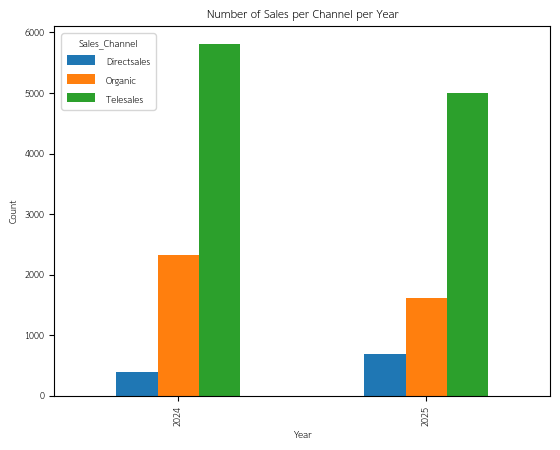

In [ ]:
#กำหนด target เป็น Sales_Channel
target = 'Sales_Channel'

# Extract 'Year' from 'Receipt_Date'
df3['Year'] = df3['Receipt_Date'].dt.year

# group by Year และ Sales_Channel
df_year_channel = df3.groupby(['Year', 'Sales_Channel'])[target].count().unstack(fill_value=0)

# plot bar chart
df_year_channel.plot(kind='bar', stacked=False)
plt.ylabel('Count')
plt.title('Number of Sales per Channel per Year')
plt.show()

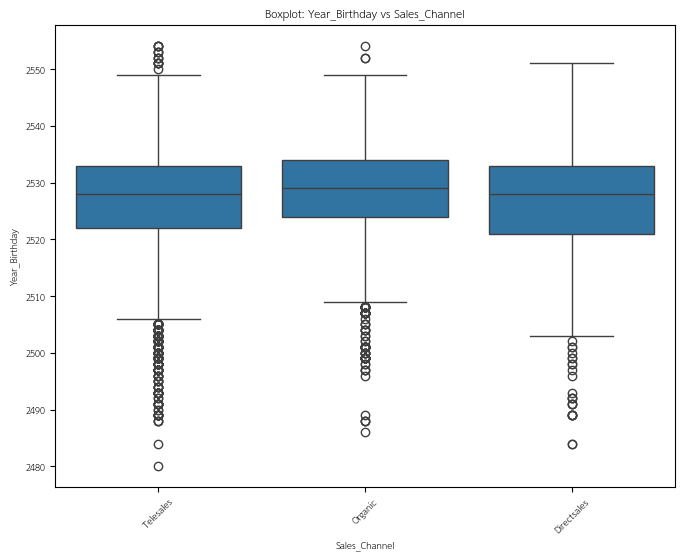

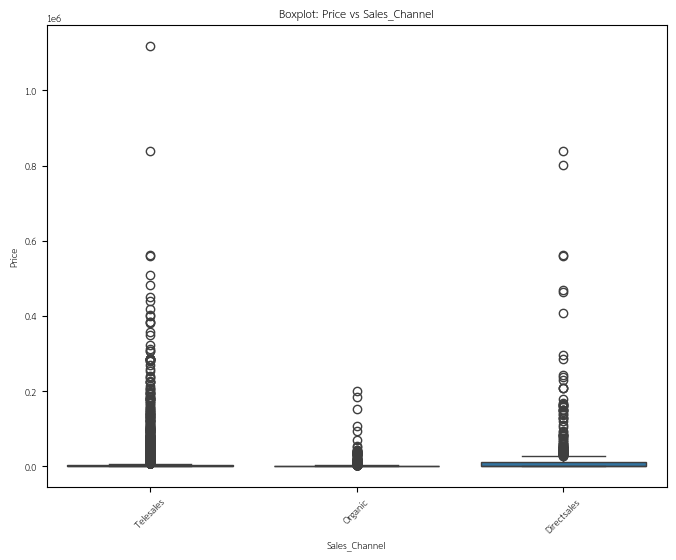

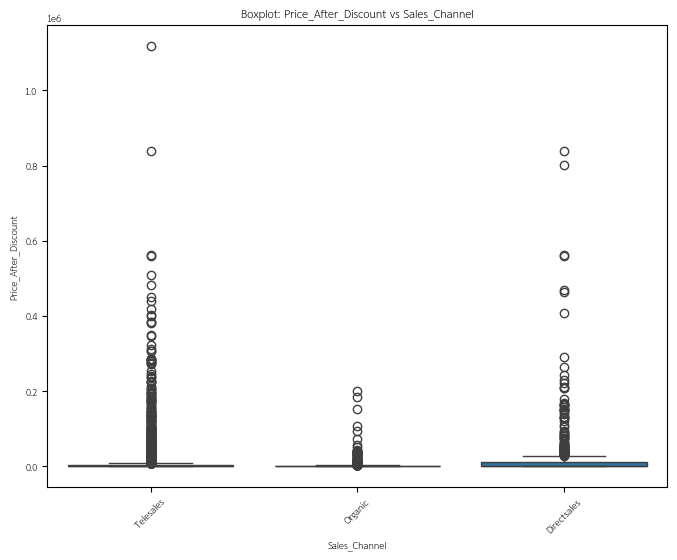

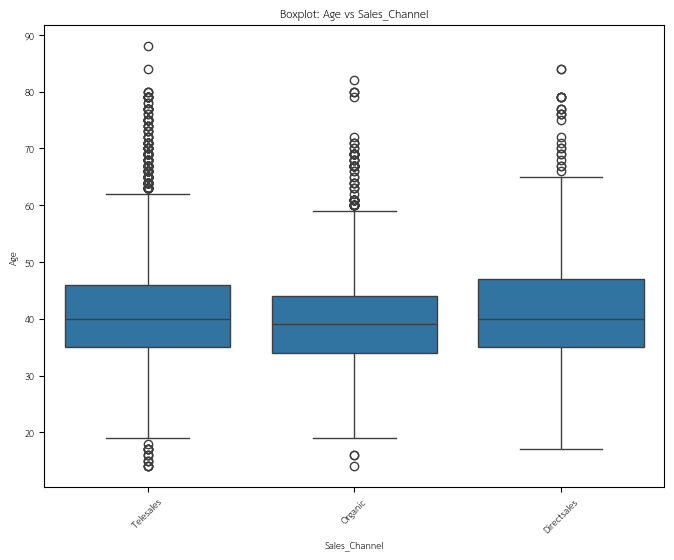

In [ ]:
# นำคอลัมน์ที่เป็นตัวเลขมาเก็บไว้ใน numerics
numerics = ['Year_Birthday','Price','Price_After_Discount','Age']

for col in numerics:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Sales_Channel', y=col, data=df3)
    plt.title(f'Boxplot: {col} vs Sales_Channel')
    plt.xticks(rotation=45)
    plt.show()

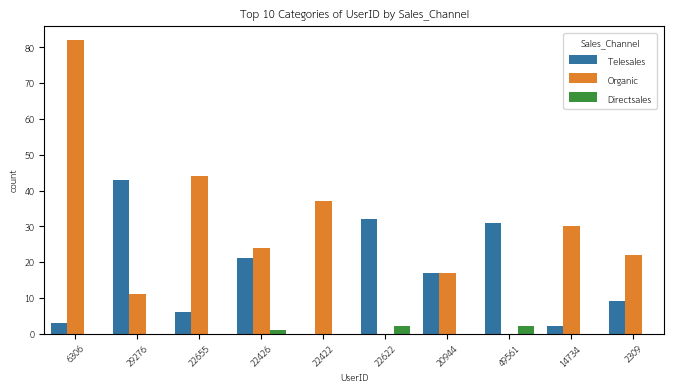

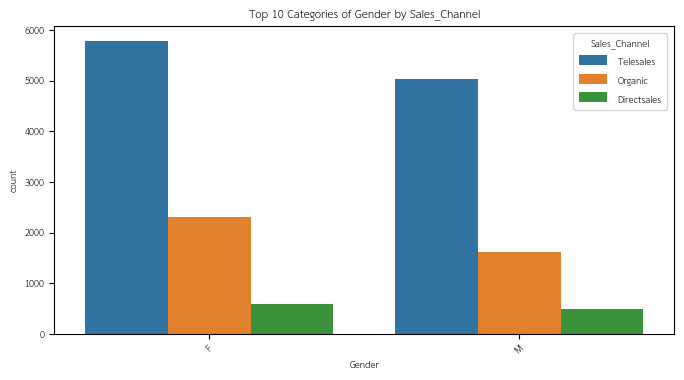

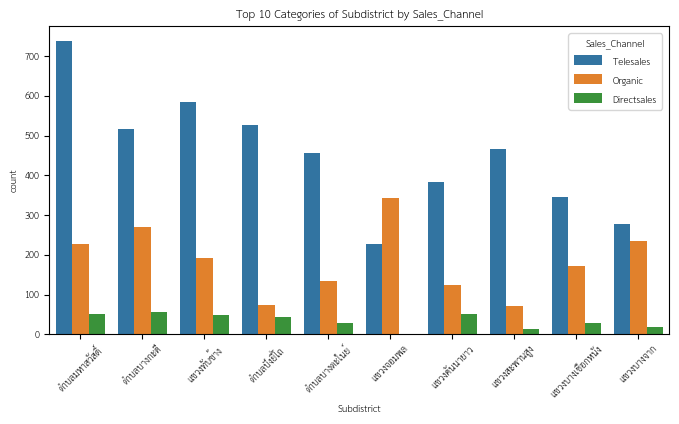

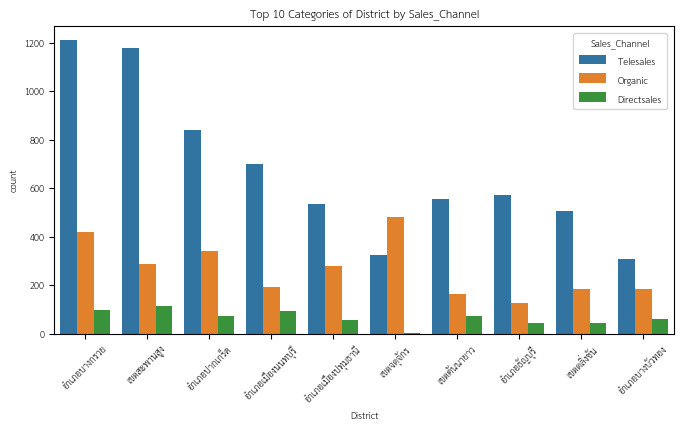

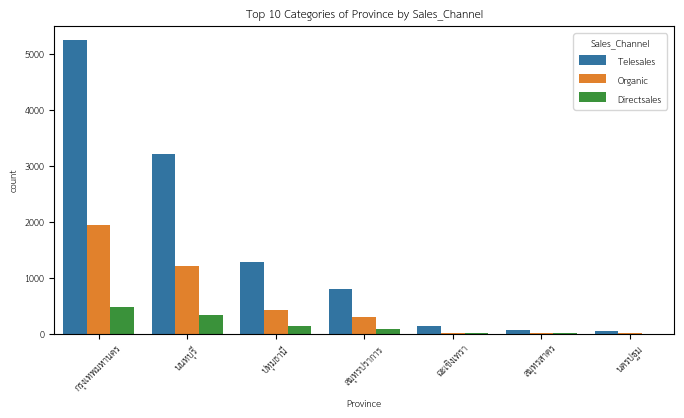

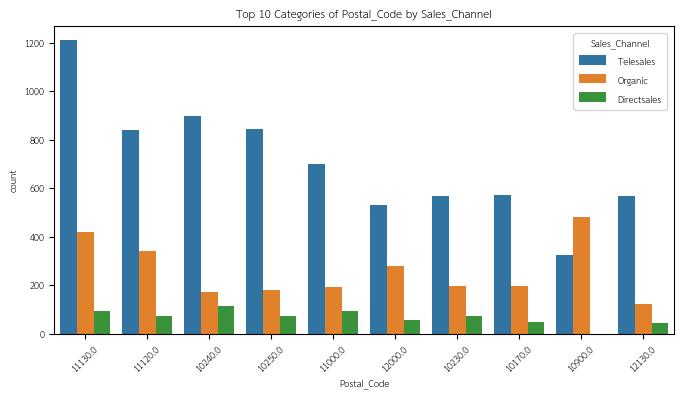

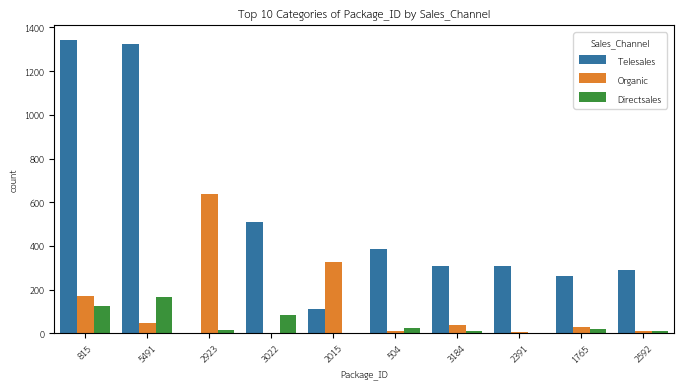

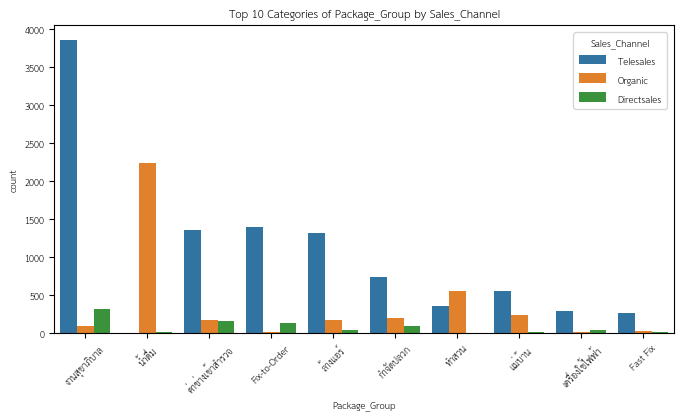

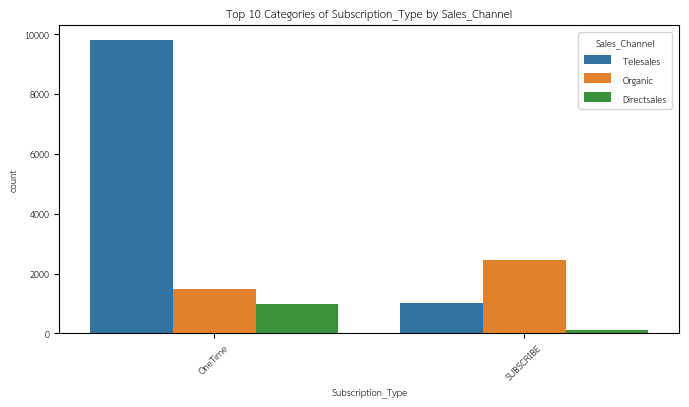

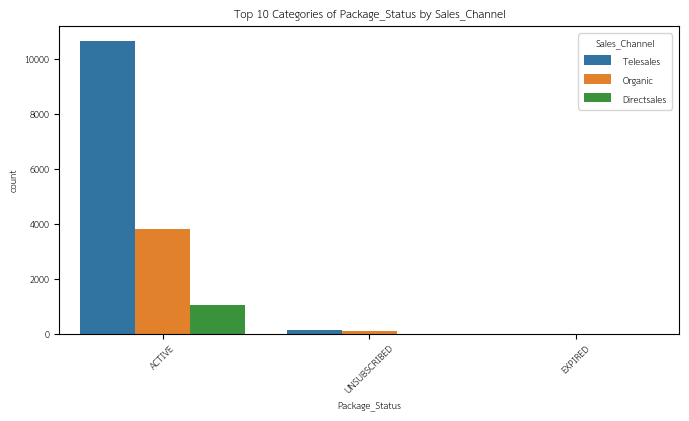

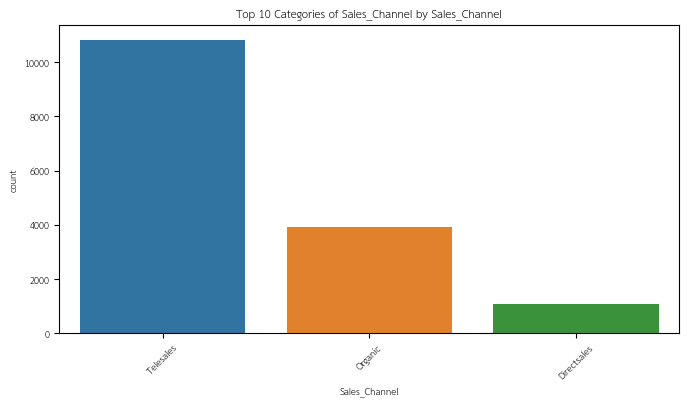

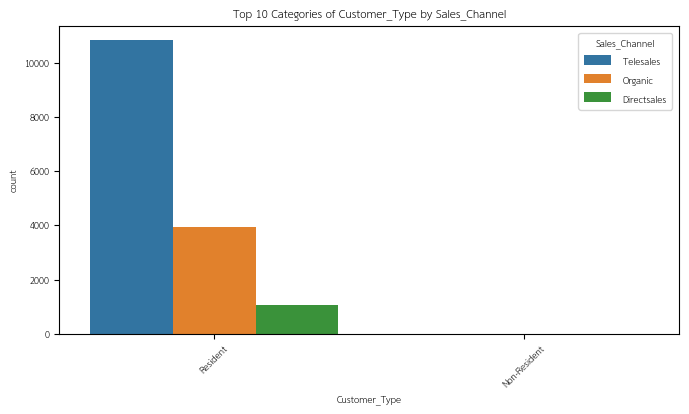

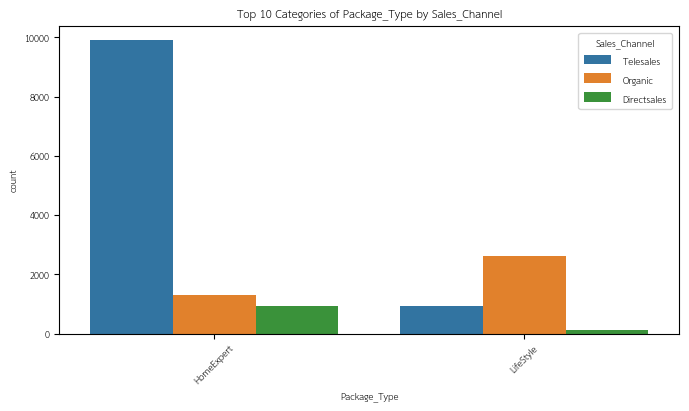

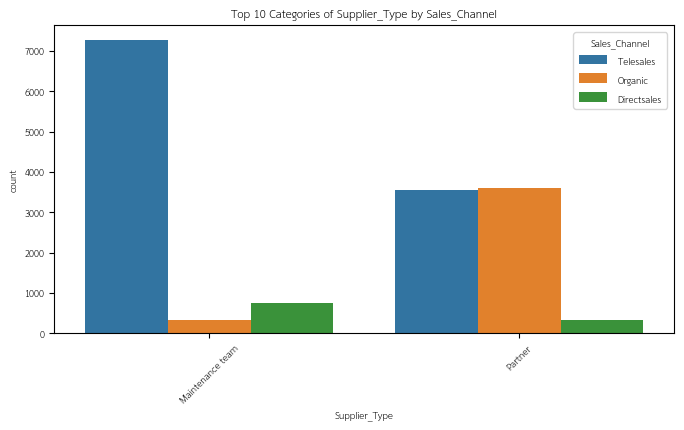

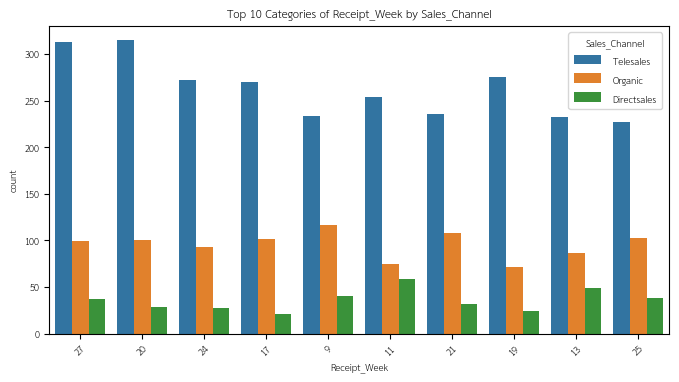

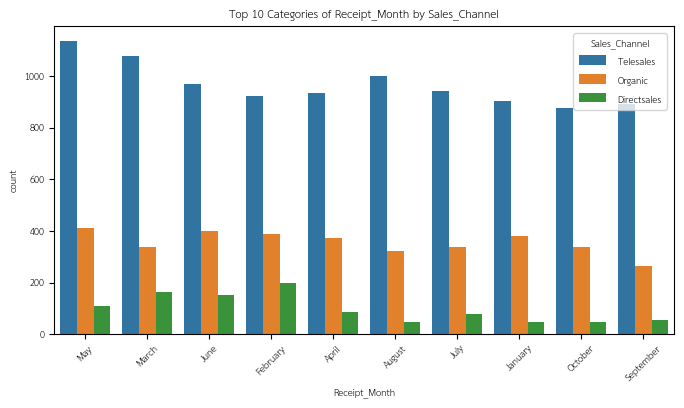

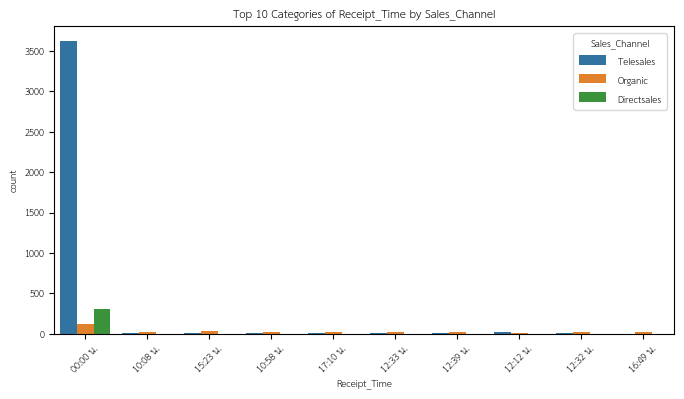

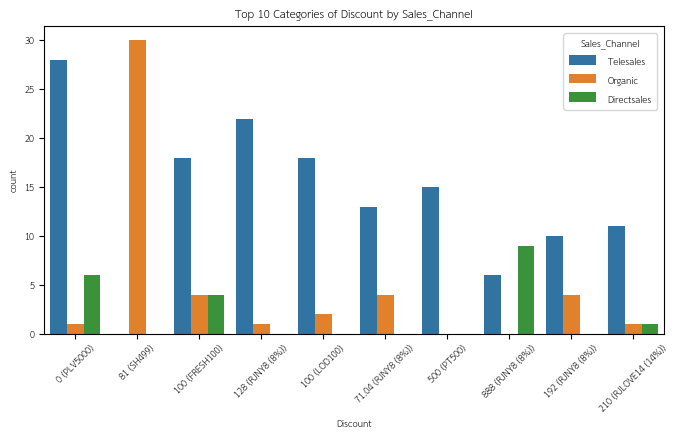

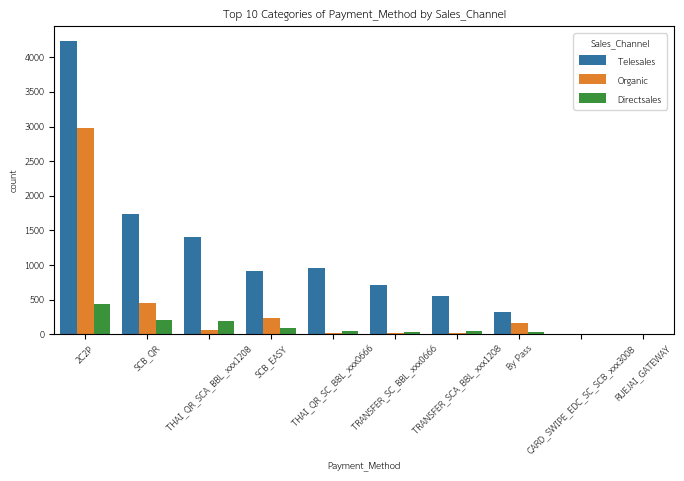

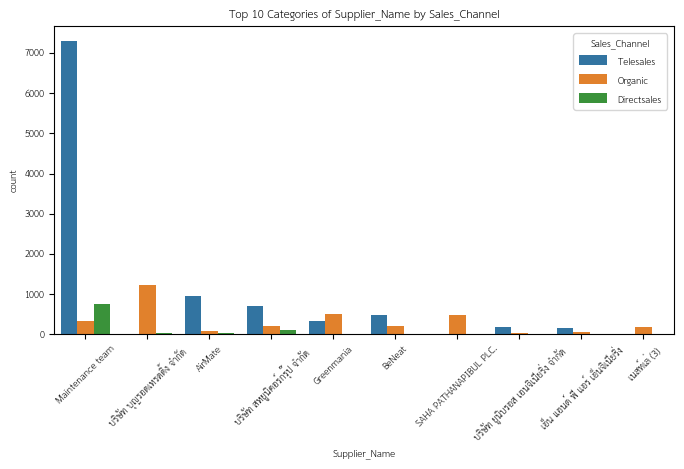

In [ ]:
# เลือกเฉพาะ columns ที่เป็น categorical
categorical = df3.select_dtypes(include='object').columns

# วนลูปผ่านแต่ละ categorical feature
for col in categorical:
    plt.figure(figsize=(8, 4))

    # ใช้ top 10 categories
    top_categories = df3[col].value_counts().index[:10]

    # สร้าง count plot โดยแยกสีตาม Sales_Channel
    sns.countplot(x=col, data=df3, order=top_categories, hue='Sales_Channel')

    # ตั้งชื่อกราฟและหมุนป้ายแกน x
    plt.title(f'Top 10 Categories of {col} by Sales_Channel')
    plt.xticks(rotation=45)

    plt.show()

In [ ]:
# Encode ข้อมูล

from sklearn.preprocessing import LabelEncoder

target = 'Sales_Channel'

#แยก Features / Target
X = df3.drop(columns=[target])
y = df3[target]

#คัดลอกข้อมูลเพื่อเตรียมแปลง data type
X2 = X.copy()

#แปลง datetime ให้เป็นตัวเลข timestamp
for col in X2.columns:
    if np.issubdtype(X2[col].dtype, np.datetime64):
        X2[col] = X2[col].astype('int64') // 10**9   # แปลงเป็น seconds

#แปลง object เป็นตัวเลขด้วย LabelEncoder
le = LabelEncoder()

for col in X2.columns:
    if X2[col].dtype == 'object':
        X2[col] = le.fit_transform(X2[col].astype(str))

#target ถ้าเป็น object ก็แปลงด้วย
if y.dtype == 'object':
    y = le.fit_transform(y.astype(str))




## **Build Machine Learning Model**

In [ ]:

#เลือก feature ที่เกี่ยวข้องต้องการทดสอบ
selected_features = [
  'Package_Type',
  'Price_After_Discount',
  'Price',
  'Subscription_Type',
  'Package_Group',
  'Age'
]

X_selected = X2[selected_features]
y_selected = y

# train-test split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=0
)

In [ ]:
#ปรับข้อมูล
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(12660, 6)
(12660,)
(3166, 6)
(3166,)


Model name

In [ ]:
#Model KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
y_predict_train = knn.predict(X_train_scaled)
y_predict_test = knn.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training accuracy : {:.2f}".format(knn.score(X_train_scaled, y_train)))
print("Test accuracy : {:.2f}".format(knn.score(X_test_scaled, y_test)))
print("Confusion matrix (test)",confusion_matrix(y_test,y_predict_test) )


Training accuracy : 0.87
Test accuracy : 0.85
Confusion matrix (test) [[  16   13  202]
 [   3  637  158]
 [  22   66 2049]]


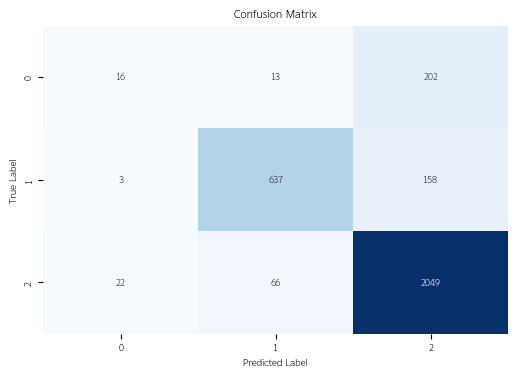

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test,y_predict_test), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate the classification report
print("\nClassification Report:")
print(classification_report(y_test,y_predict_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.07      0.12       231
           1       0.89      0.80      0.84       798
           2       0.85      0.96      0.90      2137

    accuracy                           0.85      3166
   macro avg       0.71      0.61      0.62      3166
weighted avg       0.83      0.85      0.83      3166



In [ ]:
#model LogisticRegression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
logreg.coef_

array([[-0.34636022,  0.33381222,  1.33195251, -0.47623025,  0.09752202,
         0.00344102],
       [ 0.99587471, -2.22355923, -0.97280097,  0.98660592, -0.34389416,
         0.01789613],
       [-0.64951449,  1.88974701, -0.35915154, -0.51037568,  0.24637214,
        -0.02133715]])

In [ ]:
logreg.intercept_

array([-0.81429083, -0.63350062,  1.44779144])

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train_logreg = logreg.predict(X_train_scaled)
y_pred_test_logreg = logreg.predict(X_test_scaled)
print("Training accuracy : {:.2f}".format(accuracy_score(y_train, y_pred_train_logreg)))
print("Test accuracy : {:.2f}".format(accuracy_score(y_test, y_pred_test_logreg)))
print("Confusion matrix (test)",confusion_matrix(y_test,y_pred_test_logreg) )


Training accuracy : 0.85
Test accuracy : 0.85
Confusion matrix (test) [[   1   12  218]
 [   0  613  185]
 [   1   56 2080]]


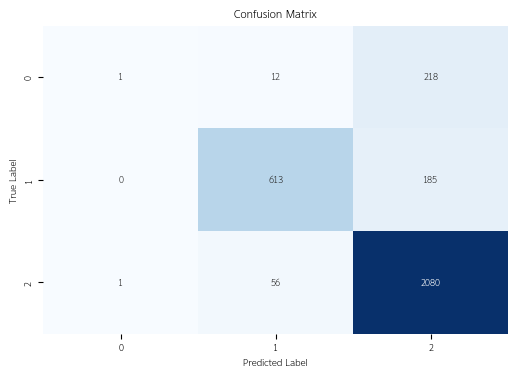

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test,y_pred_test_logreg), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_logreg))


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.00      0.01       231
           1       0.90      0.77      0.83       798
           2       0.84      0.97      0.90      2137

    accuracy                           0.85      3166
   macro avg       0.75      0.58      0.58      3166
weighted avg       0.83      0.85      0.82      3166



In [ ]:
#ลองจัดการกับข้อมูล balacne โดยข้อมูลในช่องทาง direct sales มีข้อมูลน้อยสุดอยู่่ที่ 387 transaction จริงจะทำการตัดข้อมูล ทั้ง 3 กลุ่มให้เท่ากันอยู่ที่ 380 transactio
balanced_df = df3.groupby('Sales_Channel').sample(n=380, random_state=42)
balanced_df.head()


,UserID,Gender,Year_Birthday,Subdistrict,District,Province,Postal_Code,Package_ID,Package_Group,Subscription_Type,...,Receipt_Week,Receipt_Month,Receipt_Time,Price,Discount,Price_After_Discount,Payment_Method,Supplier_Name,Age,Year
10074,46157,F,2535,ตำบลบางแก้ว,อำเภอบางพลี,สมุทรปราการ,10540.0,815,ค่าช่างเข้าสำรวจ,OneTime,...,6,February,16:20 น.,500.00,NaN,500.00,2C2P,Maintenance team,33,2025
8201,33272,M,2538,ตำบลศาลากลาง,อำเภอบางกรวย,นนทบุรี,11130.0,5370,งานสุขาภิบาล,OneTime,...,49,December,11:47 น.,2000.00,NaN,2000.00,2C2P,Maintenance team,30,2024
7966,6564,M,2504,แขวงบางแค,เขตบางแค,กรุงเทพมหานคร,10160.0,5348,Fix-to-Order,OneTime,...,47,November,14:04 น.,5249.00,NaN,5249.00,2C2P,Maintenance team,64,2024
2659,2038,M,2529,แขวงบางแค,เขตบางแค,กรุงเทพมหานคร,10160.0,4581,Fix-to-Order,OneTime,...,16,April,15:40 น.,37376.92,1495.07 (RJQ2 (4%)),35881.85,2C2P,Maintenance team,39,2024
6549,19100,F,2527,แขวงตลาดบางเขน,เขตหลักสี่,กรุงเทพมหานคร,10210.0,5001,Fix-to-Order,OneTime,...,40,September,20:34 น.,10480.00,NaN,10480.00,2C2P,Maintenance team,41,2024


In [ ]:
balanced_df.shape

(1140, 26)

In [ ]:
# Encode ข้อมูลอีกรอบด้วยข้อมูลชุดใหม่

target = 'Sales_Channel'

#แยก Features / Target
X_New = balanced_df.drop(columns=[target])
y_New = balanced_df[target]

#คัดลอกข้อมูลเพื่อเตรียมแปลง data type
X_copy = X_New.copy()

#แปลง datetime ให้เป็นตัวเลข timestamp
for col in X_copy.columns:
    if np.issubdtype(X_copy[col].dtype, np.datetime64):
        X_copy[col] = X_copy[col].astype('int64') // 10**9   # แปลงเป็น seconds

#แปลง object เป็นตัวเลขด้วย LabelEncoder
le = LabelEncoder()

for col in X_copy.columns:
    if X_copy[col].dtype == 'object':
        X_copy[col] = le.fit_transform(X_copy[col].astype(str))

#target ถ้าเป็น object ก็แปลงด้วย
if y_New.dtype == 'object':
    y_New = le.fit_transform(y_New.astype(str))



In [ ]:
#เลือก feature ที่เกี่ยวข้องต้องการทดสอบด้วยข้อมูลใหม่
selected_features = [
  'Package_Type',
  'Price_After_Discount',
  'Price',
  'Subscription_Type',
  'Package_Group',
  'Age'
]

X_selected2 = X_copy[selected_features]
y_selected2 = y_New

# train-test split data

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_selected2, y_selected2, test_size=0.2, random_state=0
)

In [ ]:
#ปรับข้อมูล
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

In [ ]:
print(X_train_scaled2.shape)
print(y_train2.shape)
print(X_test_scaled2.shape)
print(y_test2.shape)

(912, 6)
(912,)
(228, 6)
(228,)


In [ ]:
#ลองทดสอบ model ใหม่
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [3,5,7,9,11,13,15,17,19,21,25]}

# Set up the GridSearchCV
grid_search = GridSearchCV(knn2, param_grid, cv=5, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train_scaled2, y_train2)

# แสดงผล best parameter
print("Best parameters : ", grid_search.best_params_)

# ใช้ best estimator ทำนาย test set
best_knn = grid_search.best_estimator_
y_predict_train2 = best_knn.predict(X_train_scaled2)
y_predict_test2 = best_knn.predict(X_test_scaled2)


Best parameters :  {'n_neighbors': 21}


In [ ]:
print("Training accuracy : {:.2f}".format(best_knn.score(X_train_scaled2, y_train2)))
print("Test accuracy : {:.2f}".format(best_knn.score(X_test_scaled2, y_test2)))
print("Confusion matrix (test)",confusion_matrix(y_test2,y_predict_test2) )

Training accuracy : 0.63
Test accuracy : 0.61
Confusion matrix (test) [[32  9 21]
 [ 6 70  8]
 [42  3 37]]


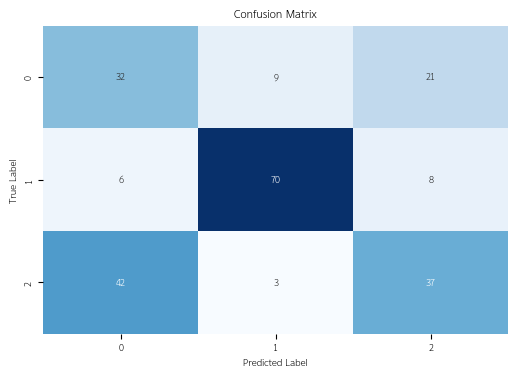

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test2,y_predict_test2), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate the classification report
print("\nClassification Report:")
print(classification_report(y_test2,y_predict_test2))


Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.52      0.45        62
           1       0.85      0.83      0.84        84
           2       0.56      0.45      0.50        82

    accuracy                           0.61       228
   macro avg       0.60      0.60      0.60       228
weighted avg       0.62      0.61      0.61       228



In [ ]:
#model LogisticRegression

from sklearn.linear_model import LogisticRegression
logreg2 = LogisticRegression()

# Define the parameter grid
param_grid2 = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Set up the GridSearchCV
grid_search = GridSearchCV(logreg2, param_grid2, cv=5)

# Fit the grid search
grid_search.fit(X_train_scaled2, y_train2)

# แสดงผล best parameter
print("Best parameters : ", grid_search.best_params_)

# ใช้ best estimator ทำนาย test set
best_logreg = grid_search.best_estimator_



Best parameters :  {'C': 10}


In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train_logreg2 = best_logreg.predict(X_train_scaled2)
y_pred_test_logreg2 = best_logreg.predict(X_test_scaled2)
print("Training accuracy : {:.2f}".format(accuracy_score(y_train2, y_pred_train_logreg2)))
print("Test accuracy : {:.2f}".format(accuracy_score(y_test2, y_pred_test_logreg2)))
print("Confusion matrix (test)",confusion_matrix(y_test2,y_pred_test_logreg2) )


Training accuracy : 0.60
Test accuracy : 0.62
Confusion matrix (test) [[42  9 11]
 [ 6 76  2]
 [53  6 23]]


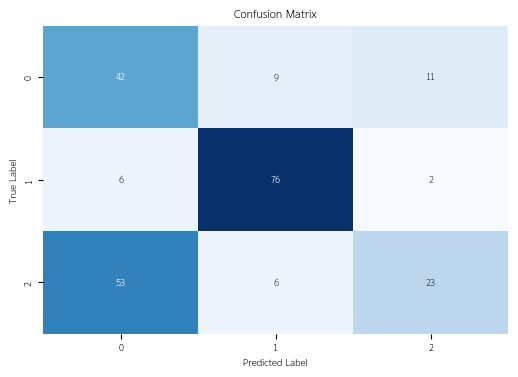

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test2,y_pred_test_logreg2), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate the classification report
print("\nClassification Report:")
print(classification_report(y_test2, y_pred_test_logreg2))


Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.68      0.52        62
           1       0.84      0.90      0.87        84
           2       0.64      0.28      0.39        82

    accuracy                           0.62       228
   macro avg       0.63      0.62      0.59       228
weighted avg       0.65      0.62      0.60       228



In [ ]:
le.classes_

array(['Directsales', 'Organic', 'Telesales'], dtype=object)

In [ ]:
print(le.classes_)
print(X_selected.columns)
print(X_selected)


['Directsales' 'Organic' 'Telesales']
Index(['Package_Type', 'Price_After_Discount', 'Price', 'Subscription_Type',
       'Package_Group', 'Age'],
      dtype='object')
       Package_Type  Price_After_Discount      Price  Subscription_Type  \
0                 0                800.00     800.00                  0   
1                 0               1600.00    1600.00                  0   
2                 1                565.00     565.00                  1   
3                 0               1399.00    1399.00                  1   
4                 1               1700.00    1700.00                  1   
...             ...                   ...        ...                ...   
18240             1                520.00     520.00                  0   
18247             0               2300.00    2300.00                  1   
18248             0             106146.68  106146.68                  0   
18249             1                600.00     600.00                  0   
18250 

## **Summary**

Model performance : Logistic Regression (หลังตัดข้อมูลข้อมูล)  
prediction accuracy : Accuracy หลังตัดข้อมูล โดยรวมลดลงแต่ผลลัพธ์มีความสมดุลมากขึ้นทั้ง 3 class (Accuracy รวม : 0.62)
- Class 0 (DirectSales) : โมเดลจับได้ดีขึ้น แต่ยังไม่แม่นยำมาก (precision : 0.42 , recall : 0.68)
- Class 1 (Organic) : จำแนกได้ดีที่สุด แม่นยำ (precision : 0.84 , recall : 0.90)
- Class 2 (TeleSales) : โมเดลจับได้น้อยแม่นยำไม่มากต้องพัฒนาเพิ่ม (precision : 0.64 , recall : 0.28)

